## Principal component analysis of reef characteristics
This notebook is devoted to a principal component analysis to see what parameters of reef environment and bleaching may be grouped, and then to see whether reefs will cluster in a way which allows useful subsets to be created.

In [4]:
%matplotlib notebook

# This code section is largely a duplicate of the data input in the
# Bleaching_Project_Data_Setup notebook, with fewer comments.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io as sio
from mytools import principal_component as pc
# Now read our data for reef cell locations.
# A copy of the data is in this repository.  The reference copy is in
# my Coral-Model-Data repository in the ProjectionsPaper directory.
mat_data = sio.loadmat('../data/ESM2M_SSTR_JD.mat')
#print(mat_data)

try:
    cells
except NameError:
    # do nothing, it's okay not to have cells yet
    pass
else:
    # Clear the variable so we don't get carryover from earlier tests. 
    cells = cells.iloc[0:0]
# Put the lat/lon columns directly into a data frame.  Note that they are stored
# with longitude first in the incoming data. 
cells = pd.DataFrame(mat_data['ESM2M_reefs_JD'], columns=['Lon', 'Lat'])
# Put in a random variable for testing
# cells['Rand'] = np.random.uniform(low=-10, high=10, size=len(modelBleaching))

cells['abs_lat'] = abs(cells['Lat'])

# It makes more sense to have longitude have a break at 0 than at +-180, since the latter is in the midddle of a coral area.
cells['Lon'] = cells['Lon']-180*(np.sign(cells['Lon'])-1)

# Now add bleaching counts from a specific run.
bleach_data = sio.loadmat('../data/HughesCompEvents_selV_rcp60E=1OA=1.mat')
# Put the bleaching counts into a data frame.
modelBleaching = pd.DataFrame(bleach_data['events80_2016'])
modelBleaching.rename(columns={0: 'Events'}, inplace=True)
# Be we really want this in the cells dataframe
cells['Events'] = modelBleaching['Events']

print(cells.head())

# Now get 1861-1950 SST mean and variance for each reef
sst = mat_data['SSTR_2M26_JD']
del mat_data  # this is big and not used again.
sst_mean = np.mean(sst, axis=1)
sst_var = np.var(sst, axis=1)
cells['SST'] = sst_mean
cells['variance'] = sst_var
print(cells.head())
all_names = list(cells)

     Lon        Lat    abs_lat  Events
0  180.5 -19.145246  19.145246       2
1  180.5 -18.311912  18.311912       2
2  180.5 -17.500333  17.500333       2
3  180.5 -16.710136  16.710136       1
4  180.5 -15.940584  15.940584       1
     Lon        Lat    abs_lat  Events        SST  variance
0  180.5 -19.145246  19.145246       2  26.051836  2.952026
1  180.5 -18.311912  18.311912       2  26.373503  2.654303
2  180.5 -17.500333  17.500333       2  26.622993  2.420091
3  180.5 -16.710136  16.710136       1  26.928833  2.224938
4  180.5 -15.940584  15.940584       1  27.229943  1.902959


<IPython.core.display.Javascript object>


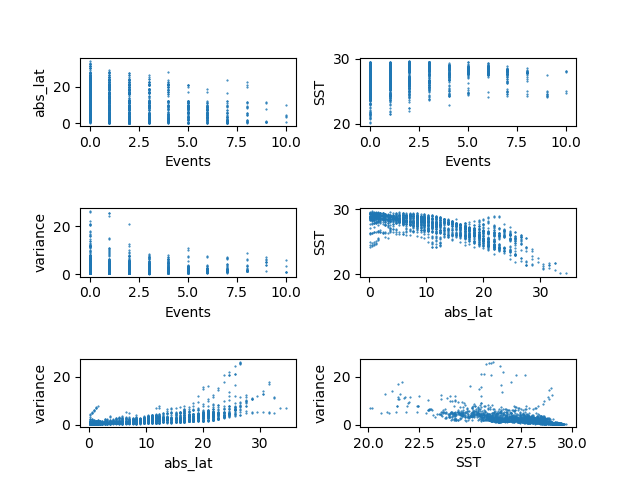

Plotting 4 variables in 6.0 plots and 3.0 rows.
There are 1925 rows of data.


In [32]:
import math
def scatter_all(df, marker_size=1):
    names = list(df)
    var_count = len(names)
    # there a "n choose 2" plots
    p_count = math.factorial(var_count)/2/math.factorial(var_count-2)
    rows = np.ceil(p_count/2)
    print('Plotting', var_count, 'variables in', p_count, 'plots and', rows, 'rows.')
    print('There are', len(df), 'rows of data.')
    count = 1;
    for i, namex in enumerate(names):
        for j, namey in enumerate(names[i+1:]):
            plt.subplot(rows, 2, count)
            plt.scatter(df[namex], df[namey], marker='.', s=marker_size)
            plt.xlabel(namex)
            plt.ylabel(namey)
            count = count + 1
    plt.subplots_adjust(hspace=1.2, wspace=0.3)

plt.figure()
scatter_all(cells[['Events', 'abs_lat', 'SST', 'variance']])        


In [6]:
# Now get the data to do this for subsets of cells.
import pickle
with open('../results/Logan_cells_events_region.pkl', 'rb') as f:
    region_cells = pickle.load(f)
# Note that region_cells has some but not all of the same columns as cells, but the same row order.
# Copy just the region id column into cells
cells['Region'] = region_cells['Region']
cells.head()

,Lon,Lat,abs_lat,Events,SST,variance,Region
0,180.5,-19.145246,19.145246,2,26.051836,2.952026,Pac
1,180.5,-18.311912,18.311912,2,26.373503,2.654303,Pac
2,180.5,-17.500333,17.500333,2,26.622993,2.420091,Pac
3,180.5,-16.710136,16.710136,1,26.928833,2.224938,Pac
4,180.5,-15.940584,15.940584,1,27.229943,1.902959,Pac


<IPython.core.display.Javascript object>


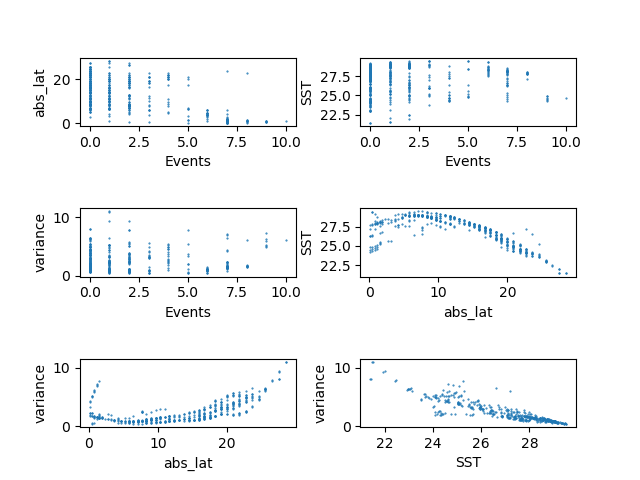

Plotting 4 variables in 6.0 plots and 3.0 rows.
There are 458 rows of data.


In [14]:
# All region plots should use the same set of columns.
p_names = ['Events', 'abs_lat', 'SST', 'variance']
# Pacific:
plt.figure()
c_pac = cells[cells['Region'] == 'Pac']
scatter_all(c_pac[p_names]) 

<IPython.core.display.Javascript object>


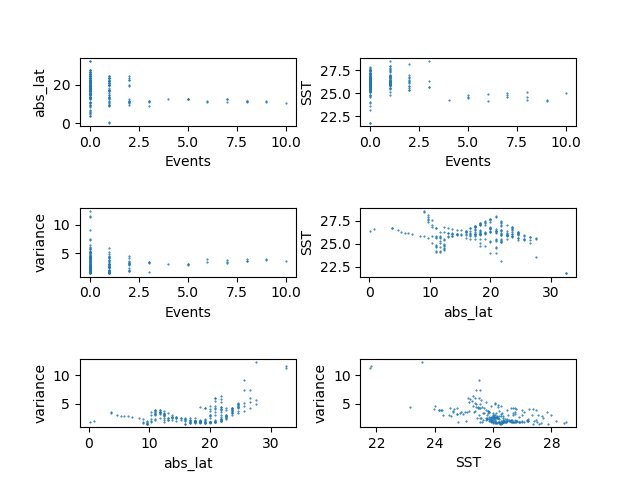

Plotting 4 variables in 6.0 plots and 3.0 rows.
There are 220 rows of data.


220

In [15]:
# Caribbean/Atlantic:
plt.figure()
c_atl = cells[cells['Region'] == 'WAtl']
scatter_all(c_atl[p_names])
len(c_atl)

<IPython.core.display.Javascript object>


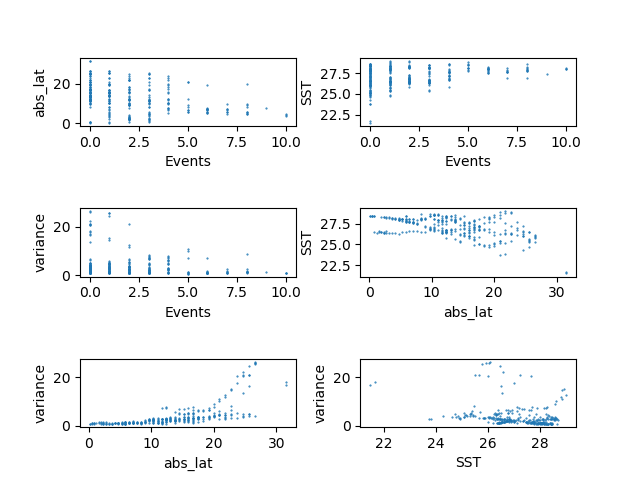

Plotting 4 variables in 6.0 plots and 3.0 rows.
There are 301 rows of data.


301

In [16]:
# Indian Ocean - Middle East:
plt.figure()
c_io = cells[cells['Region'] == 'IO-ME']
scatter_all(c_io[p_names]) 
len(c_io)

<IPython.core.display.Javascript object>


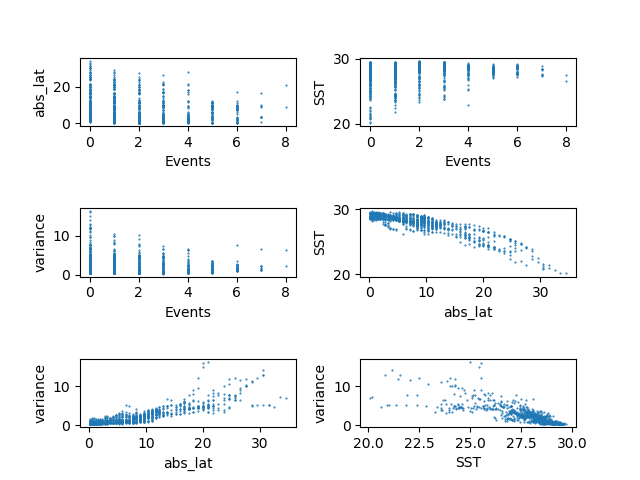

Plotting 4 variables in 6.0 plots and 3.0 rows.
There are 946 rows of data.


946

In [17]:
# Australasia:
plt.figure()
c_au = cells[cells['Region'] == 'AuA']
scatter_all(c_au[p_names]) 
len(c_au)

<IPython.core.display.Javascript object>


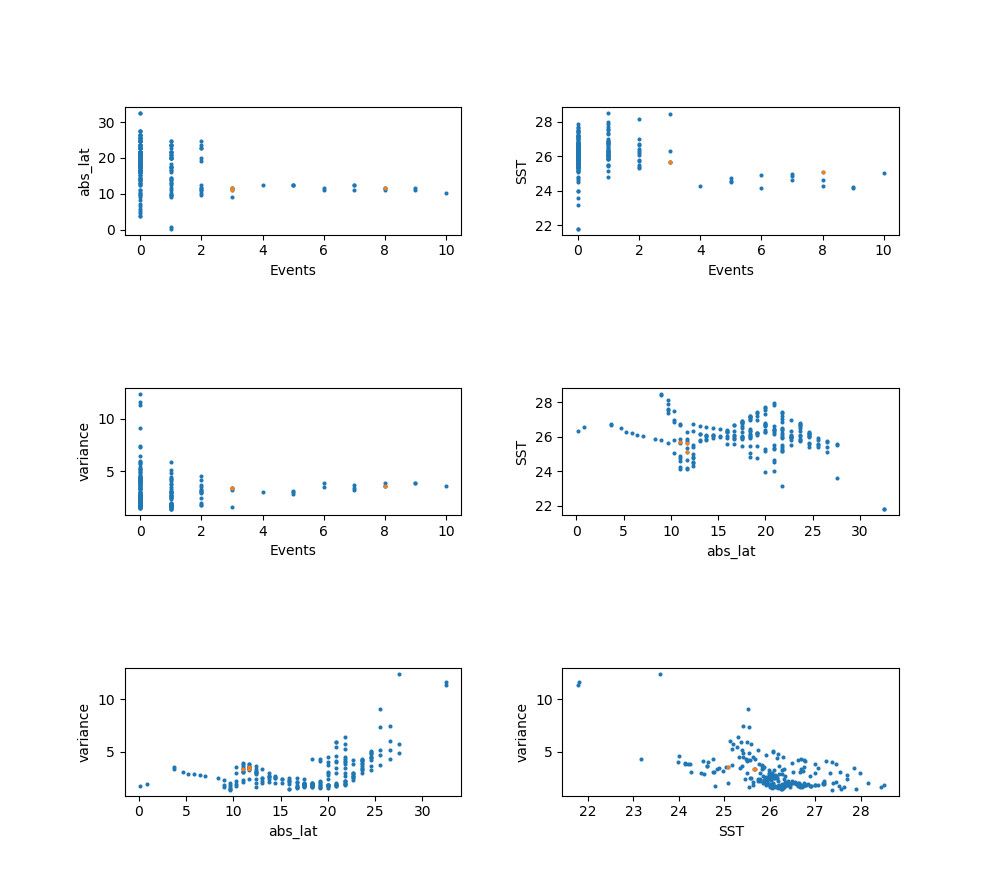

Plotting 4 variables in 6.0 plots and 3.0 rows.
There are 220 rows of data.
Plotting 4 variables in 6.0 plots and 3.0 rows.
There are 3 rows of data.


D:\Users\Steve\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


,Lon,Lat,abs_lat,Events,SST,variance,Region
400,291.5,11.673772,11.673772,3,25.657917,3.400902,WAtl
404,292.5,11.001426,11.001426,3,25.679350,3.366244,WAtl
405,292.5,11.673772,11.673772,8,25.092791,3.562586,WAtl


In [36]:
# Caribbean/Atlantic, with Hughes outlier locations highlighted.
# Lat is 11.2 to 12.2 and Lon is -66.9 to -69, using Hughes values
plt.figure()
c_atl = cells[cells['Region'] == 'WAtl']
scatter_all(c_atl[p_names], marker_size=15)
# Note that Lon is positive-value form (0-360) at this point.
#c_atl_3 = c_atl[(c_atl['Lat'] < 12.3) & (c_atl['Lon'] > 360-69.1) & (c_atl['Lon'] < 360-66.8)]
c_atl_3 = c_atl[(c_atl['Lat'] < 12.3) & (c_atl['Lon'] > 360-69.1) & (c_atl['Lon'] < 360-66.8)]
scatter_all(c_atl_3[p_names], marker_size=12)
c_atl_3.head()